<h1><center>Customer Segmentation Using RFM Analysis in Python</center></h1>

Retail industry, an early adopter of data warehousing, has largely benefited from the capacity and capability of data warehouses such as Teradata, Oracle, etc. to host an exceptionally large amount of data. On the daily basis, colossal amount of data is generated across the stores.
The main purpose of storing such a huge amount of data is to analyse the behaviour of customers and make strategies accordingly in order to drive more profits. But the amount of data generated is so huge that it makes any analysis a very difficult task.
This project will demonstrate how customers can be segmented in different segment along with the code in Python.

# Dataset 
For my analysis I am using a sample dataset from a retail customer dataset containg sales data for 1 year containing around 541909 observations with 8 features variables.
The link to the dataset can be found here:- http://archive.ics.uci.edu/ml/machine-learning-databases/00352/




In [1]:
# importing all the packages required for the data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from IPython.display import display, HTML

In [2]:
# loading the dataset:
df = pd.read_excel('/Users/deepanshparab/Downloads/Online Retail.xlsx')


In [3]:
print(df.head(10))
# looking at the shape of the dataset
df.shape

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

(541909, 8)

# Data Explorations:
Columns Description :
* InvoiceNo : Unique ID for every time a consumer visits the store
* StockCode: Unique ID for a product
* Description : Description of the product
* Quantity : No of units bought
* InvoiceDate : Date and time of purchase
* Unit Price : Price for 1 unit of the product
* CustomerId : Unique ID for each customer
* Country : Country where transaction happened

    

Also for our analysis we need to calculate the total sales for each product by multiplying Quantity with Unit Price. Also,  convert Invoice Date in YYYYMM format.


In [77]:
df['Total_Price'] = df['UnitPrice']*df['Quantity']

tst = df.groupby(['InvoiceDate','InvoiceNo'])
        
tst.size()

# converting 
df['date'] = df['InvoiceDate'].map(lambda x: 100*x.year + x.month)

tst = df.groupby(['date'])
tst.size()

date
201012    42481
201101    35147
201102    27707
201103    36748
201104    29916
201105    37030
201106    36874
201107    39518
201108    35284
201109    50226
201110    60742
201111    84711
201112    25525
dtype: int64

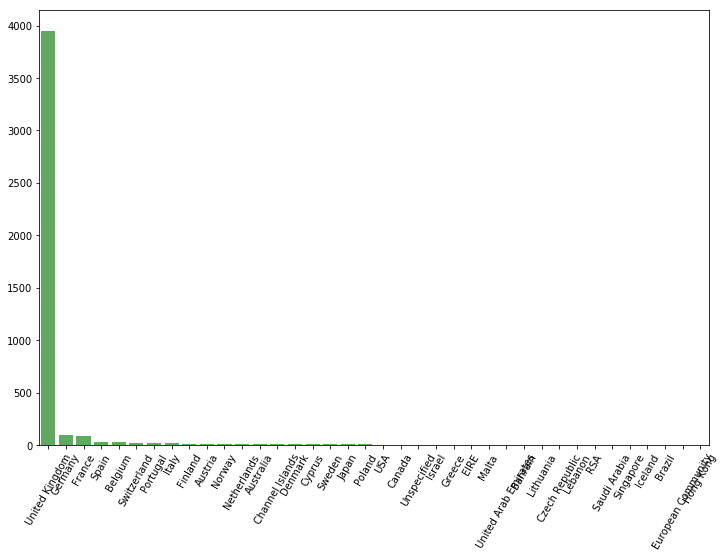

In [78]:
# checking country-wise sales 
Cust_country=df[['Country','CustomerID']].drop_duplicates()

#Calculating the distinct count of customer for each country
Cust_country_count=Cust_country.groupby(['Country'])['CustomerID'].\
aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

#Plotting the count of customers
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['CustomerID'])
plt.figure(figsize=(12,8))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

It can be seen from the graph that around 90% of the customers exist in United Kingdom only followed by Germany and France. Hence, the company should focus on the United Kingdom for it marketing and other strategies.

Now we will start with the RFM analysis. I tagged each customer on a scale of 1 to 5 for each of the criterion where 5 will be the highest and 1 will be the lowest tagging. The customers on the top of all the three criterion will be the most significant customers.
### RFM (Recency, Frequency, Monetary) analysis
RFM criterion is one of the oldest and most widely used technique for selecting the most significant customers. It supports the selection of customers that are most recent (R), frequent (F), and add a larger monetary value (M) in every transaction.
* Recency (R): Recency is the most important predictor of who is more likely to respond to an offer. Customers who have purchased recently are more likely to purchase again when compared to those who did not purchase recently.
To tag the customers on the basis of recency flag, we will first filter the customers of United Kingdom and take distinct dates of their purchase.


In [79]:

Cust_date_UK=df[df['Country']=='United Kingdom']
Cust_date_UK=Cust_date_UK[['CustomerID','date']].drop_duplicates()



I tagged the customers from 1 to 5 in steps of 2 months i.e. 5 if customer bought in last 2 months else 4 if made a purchase in last 4 months and so on. Finally for a customer, maximum of the recency flag is taken as final recency flag.

In [80]:

def recency(row):
    if row['date']>201110:
        val = 5
    elif row['date'] <= 201110 and row['date'] > 201108:
        val = 4
    elif row['date'] <= 201108 and row['date'] > 201106:
        val = 3
    elif row['date'] <= 201106 and row['date'] > 201104:
        val = 2
    else:
        val = 1
    return val

Cust_date_UK['Recency_Flag'] = Cust_date_UK.apply(recency, axis=1)
Cust_date_UK.head()   



,CustomerID,date,Recency_Flag
0,17850.0,201012,1
9,13047.0,201012,1
46,13748.0,201012,1
65,15100.0,201012,1
82,15291.0,201012,1


In [81]:
tst = Cust_date_UK.groupby('Recency_Flag')
tst.size()

Recency_Flag
1    4014
2    1930
3    1768
4    2464
5    2167
dtype: int64

It can be seen that around <b>2200</b> customers out of 3900 customers have purchased in last 2 months. Note that some customers have not visited the store in last 4–8 months. To regain that lost customer base, business should look out for the reasons why these customers stop visiting the stores.


### Frequency (F):
The second most important factor is how frequently these customers purchase. The higher the frequency, the higher is the chances of these responding to the offers.
To tag the customers on the basis of frequency flag, we will take country wise count of distinct invoice number for each customer and then filter out the customers of United Kingdom.
After that, invoice count will be split into 5 equal parts to rank the customers on a scale of 1 to 5 where 5 being the most frequent.


In [82]:
Cust_freq=df[['Country','InvoiceNo','CustomerID']].drop_duplicates()
Cust_freq.head()

#Calculating the count of unique purchase for each customer and his buying freq in descending order
Cust_freq_count=Cust_freq.groupby(['Country','CustomerID'])['InvoiceNo'].aggregate('count').\
reset_index().sort_values('InvoiceNo', ascending=False)


Cust_freq_count_UK=Cust_freq_count[Cust_freq_count['Country']=='United Kingdom']
Cust_freq_count_UK.head()
unique_invoice=Cust_freq_count_UK[['InvoiceNo']].drop_duplicates()




In [83]:
# Dividing in 5 equal parts
unique_invoice['Freqency_Band'] = pd.qcut(unique_invoice['InvoiceNo'], 5)
unique_invoice=unique_invoice[['Freqency_Band']].drop_duplicates()
unique_invoice



,Freqency_Band
428,"(55.0, 224.0]"
2017,"(38.0, 55.0]"
2031,"(25.0, 38.0]"
4057,"(13.0, 25.0]"
2856,"(0.999, 13.0]"


In [84]:
def frequency(row):
    if row['InvoiceNo'] <= 13:
        val = 1
    elif row['InvoiceNo'] > 13 and row['InvoiceNo'] <= 25:
        val = 2
    elif row['InvoiceNo'] > 25 and row['InvoiceNo'] <= 38:
        val = 3
    elif row['InvoiceNo'] > 38 and row['InvoiceNo'] <= 55:
        val = 4
    else:
        val = 5
    return val

Cust_freq_count_UK['Freq_Flag'] = Cust_freq_count_UK.apply(frequency, axis=1)


/Users/deepanshparab/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [85]:
#Let us check the distribution of Frequency flags:
Cust_freq_count_UK.groupby(['Freq_Flag']).size()


Freq_Flag
1    3669
2     192
3      51
4      25
5      13
dtype: int64

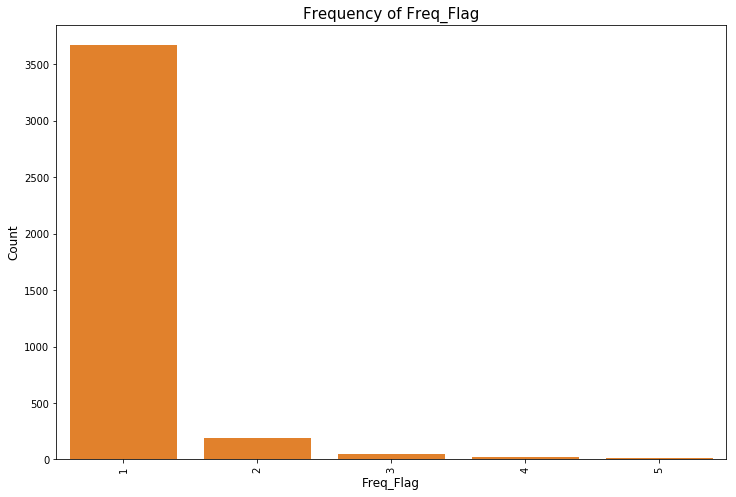

In [86]:
plt.figure(figsize=(12,8))
sns.countplot(x='Freq_Flag', data=Cust_freq_count_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Freq_Flag', fontsize=15)
plt.show()

### Monetary Value (M): 
The third factor is the amount of money these customers have spent on purchases. Customers who have spent higher contribute more value to the business as compared to those who have spent less.
To tag the customers on the basis of monetary flag, we will take country wise sum of Total price for each customer and then filter out the customers of United Kingdom.

In [87]:
#Calculating the Sum of total monetary purchase for each customer

Cust_monetary = df.groupby(['Country','CustomerID'])['Total_Price'].aggregate('sum').\
reset_index().sort_values('Total_Price', ascending=False)
Cust_monetary_UK=Cust_monetary[Cust_monetary['Country']=='United Kingdom']


Notice that there are some negative values in the total price column. This is the case because when a customer returns the product it purchased, it is stored as a negative value in the quantity column.
Before splitting Total price in 5 parts, we will remove these negative quantities.

In [88]:
unique_price=Cust_monetary_UK[['Total_Price']].drop_duplicates()
unique_price=unique_price[unique_price['Total_Price'] > 0]
unique_price['monetary_Band'] = pd.qcut(unique_price['Total_Price'], 5)
unique_price=unique_price[['monetary_Band']].drop_duplicates()
unique_price

,monetary_Band
4237,"(1932.504, 256438.49]"
1959,"(892.136, 1932.504]"
930,"(463.248, 892.136]"
1877,"(243.046, 463.248]"
2879,"(-0.000999999999988, 243.046]"


In [89]:
def monetary(row):
    if row['Total_Price'] <= 243:
        val = 1
    elif row['Total_Price'] > 243 and row['Total_Price'] <= 463:
        val = 2
    elif row['Total_Price'] > 463 and row['Total_Price'] <= 892:
        val = 3
    elif row['Total_Price'] > 892 and row['Total_Price'] <= 1932:
        val = 4
    else:
        val = 5
    return val
Cust_monetary_UK['Monetary_Flag'] = Cust_monetary_UK.apply(monetary, axis=1)


/Users/deepanshparab/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
# Let us check the distribution of Monetary flags:
Cust_monetary_UK.groupby(['Monetary_Flag']).size()

Monetary_Flag
1    842
2    784
3    778
4    773
5    773
dtype: int64

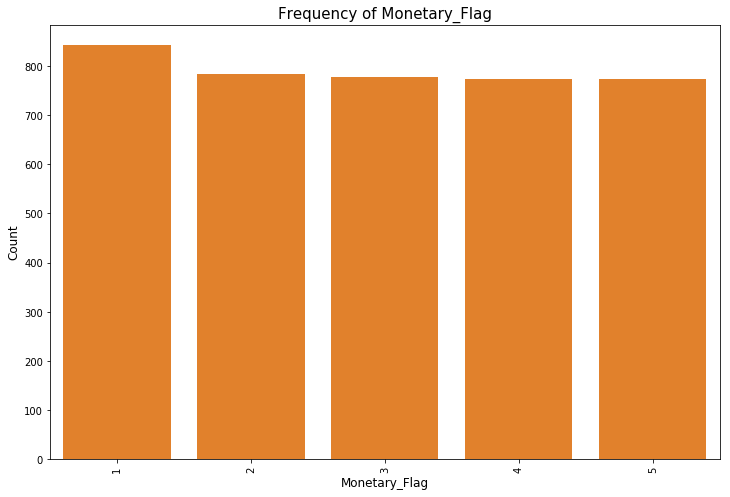

In [91]:
plt.figure(figsize=(12,8))
sns.countplot(x='Monetary_Flag', data=Cust_monetary_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetary_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Monetary_Flag', fontsize=15)
plt.show()

There is an almost equal distribution of customers as far as monetary value is concerned.


In [92]:

# Combining all the three flags :
# Cust_UK_All=pd.merge(Cust_date_UK,Cust_freq_count_UK[['CustomerID','Freq_Flag']],\
# on=['CustomerID'],how='left')
Cust_UK_All=pd.merge(Cust_UK_All,Cust_monetary_UK[['CustomerID','Monetary_Flag']],\
on=['CustomerID'],how='left')


Cust_UK_All.head(10)





,CustomerID,Recency_Flag,Freq_Flag,Monetary_Flag_x,Monetary_Flag_y
0,12346.0,1,1,1,1
1,12747.0,5,1,5,5
2,12748.0,5,5,5,5
3,12749.0,5,1,5,5
4,12820.0,5,1,4,4
5,12821.0,2,1,1,1
6,12822.0,4,1,4,4
7,12823.0,4,1,4,4
8,12824.0,4,1,2,2
9,12826.0,5,1,4,4


### Analysis Report
Based on business requirements, various cut-offs are imposed on each of the three parameters. After applying the cut-offs, customers can be classified mainly in three segments:
* <b>Customers clearing all the three cut-offs</b> are the best and the most reliable customers. Business should focus on making customised promotional strategies and loyalty schemes for these customers in order to retain this valuable customer base.
* <b>Customers failing the recency criterion only </b>are those customers who have stopped visiting the store. Business should focus on these customers and look out for the reason why they abandoned visiting the stores.
* <b>Customers clearing the recency criterion but failing frequency criterion</b> are the new customers. Business should provide more incentives and offers to these customers and try to retain these new customers.
Apart from segmenting customers, business can also use RFM criterion to filter out a reliable customer base and perform analysis like Market Basket Analysis to see customer buying pattern or assess the success of marketing strategies by analysing the response of these customers.